

## Batch, Gradiente estocastico, vs MiniBatch


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

D:\UserFiles\anaconda\envs\ia\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\UserFiles\anaconda\envs\ia\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
D:\UserFiles\anaconda\envs\ia\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

D:\UserFiles\anaconda\envs\ia\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\UserFiles\anaconda\envs\ia\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
D:\UserFiles\anaconda\envs\ia\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


# Regresión lineal por batch(iterativo) Lento

In [3]:
X = 2 * np.random.rand(500, 1)
y = 4 + 3 * X + np.random.randn(500, 1)
A = np.c_[np.ones((len(X), 1)), X]  # montar la matriz
b=y


In [4]:
lr = 0.1
n_iteraciones = 1000
m = len(A)
w = np.random.randn(2,1)
for iteraciones in range(n_iteraciones):
    gradiente = 2/m * A.T.dot(A.dot( w) - y)
    w= w - lr* gradiente

In [5]:
w

array([[4.08927834],
       [2.94098895]])

In [6]:
X_nuevo= np.array([[0], [2]])
X_nuevo_b = np.c_[np.ones((2, 1)), X_nuevo] 

In [7]:
theta_path_bgd = []

def graficarDescensoGradiente(w, eta, theta_path=None):
    m = len(A)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_nuevo_b.dot(w)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_nuevo, y_predict, style)
        gradients = 2/m * A.T.dot(A.dot(theta) - y)
        w = w - eta * gradients
        if theta_path_bgd is not None:
            theta_path_bgd.append(w)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

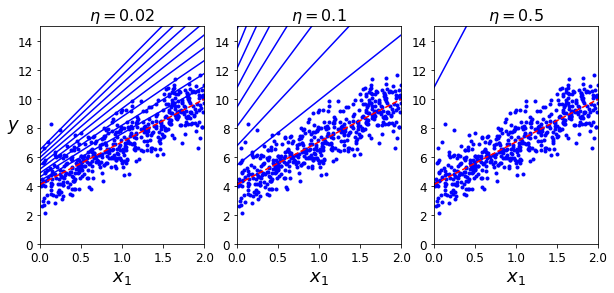

In [8]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); graficarDescensoGradiente(w, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); graficarDescensoGradiente(w, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); graficarDescensoGradiente(w, eta=0.5)

plt.show()

# Gradiente descendente estocástico

In [10]:
theta_path_sgd = []
m = len(A)
np.random.seed(42)

In [11]:
np.random.randint(m)

102

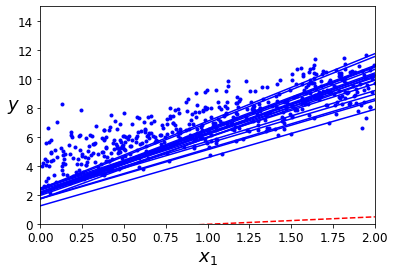

In [12]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_nuevo_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_nuevo, y_predict, style)        # not shown
        random_index =np.random.randint(m)
        xi = A[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                                # not shown
plt.show()                                           # not shown

In [14]:
theta

array([[4.0903002],
       [2.9575484]])

In [15]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1  , random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42, tol=-inf)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.0631859]), array([2.92530098]))

# gradiente descendente en minibatch

In [17]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices =  np.random.permutation(m)
    X_b_shuffled =A[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [18]:
theta

array([[4.10690024],
       [2.96903469]])

In [19]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

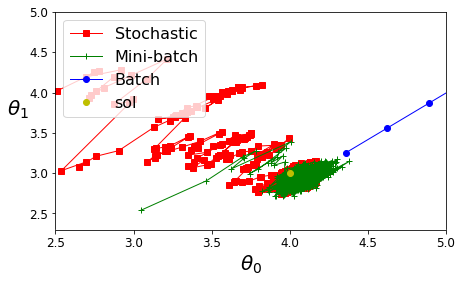

In [20]:
plt.figure(figsize=(7,4))

plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=1, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=1, label="Batch")
plt.plot(4, 3, "yo", label="sol")

plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 5, 2.3, 5])
plt.show()

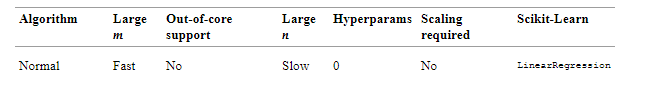
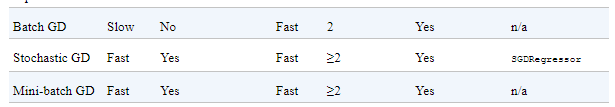